# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.053142e+01     8.064993e+00
 * time: 0.0034401416778564453
     1     3.008657e+01     5.745535e+00
 * time: 0.015474081039428711
     2     1.987234e+01     4.977474e+00
 * time: 0.030135154724121094
     3     1.516843e+01     4.141881e+00
 * time: 0.04502105712890625
     4     1.119329e+01     2.045568e+00
 * time: 0.0596461296081543
     5     9.442578e+00     9.603868e-01
 * time: 0.07449102401733398
     6     8.804267e+00     1.319988e+00
 * time: 0.08623504638671875
     7     8.479960e+00     6.165998e-01
 * time: 0.09799814224243164
     8     8.243237e+00     5.196581e-01
 * time: 0.1098630428314209
     9     8.123199e+00     4.412638e-01
 * time: 0.12164521217346191
    10     8.034724e+00     3.901161e-01
 * time: 0.13336801528930664
    11     8.003752e+00     7.189602e-01
 * time: 0.14229607582092285
    12     7.970210e+00     5.128089e-01
 * time: 0.15108418464660645
    13     7.961599e+00     7.588817e-01
 * tim

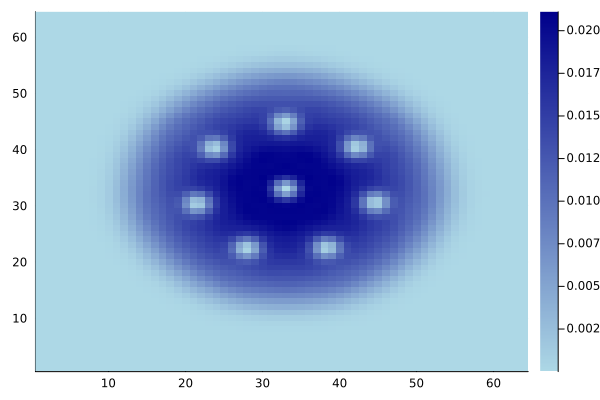

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)